In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
series_metrics = ['in', 'out', 'current', 'existing', 'creating', 'averageLatency']
histo_metrics = ['timeToServe', 'timeOfInvoke']
smoothed = ['in', 'out']

def read_tables(folder):
    snapshots = pd.read_csv(folder + '/snapshots.csv')
    activations = pd.read_csv(folder + '/activations.csv')
    return format_data(snapshots, activations)

def format_data(*dfs):
    def convert(df):
        df['elapse'] = pd.to_timedelta(df['elapse'], unit='ns')
        return df.set_index('elapse')
    return map(convert, dfs)

### Read and Format Data Tables

In [3]:
folder = "../algorithm-simulator/out/ramp"
snapshots, activations = read_tables(folder)

### Plot Time-series Metrics

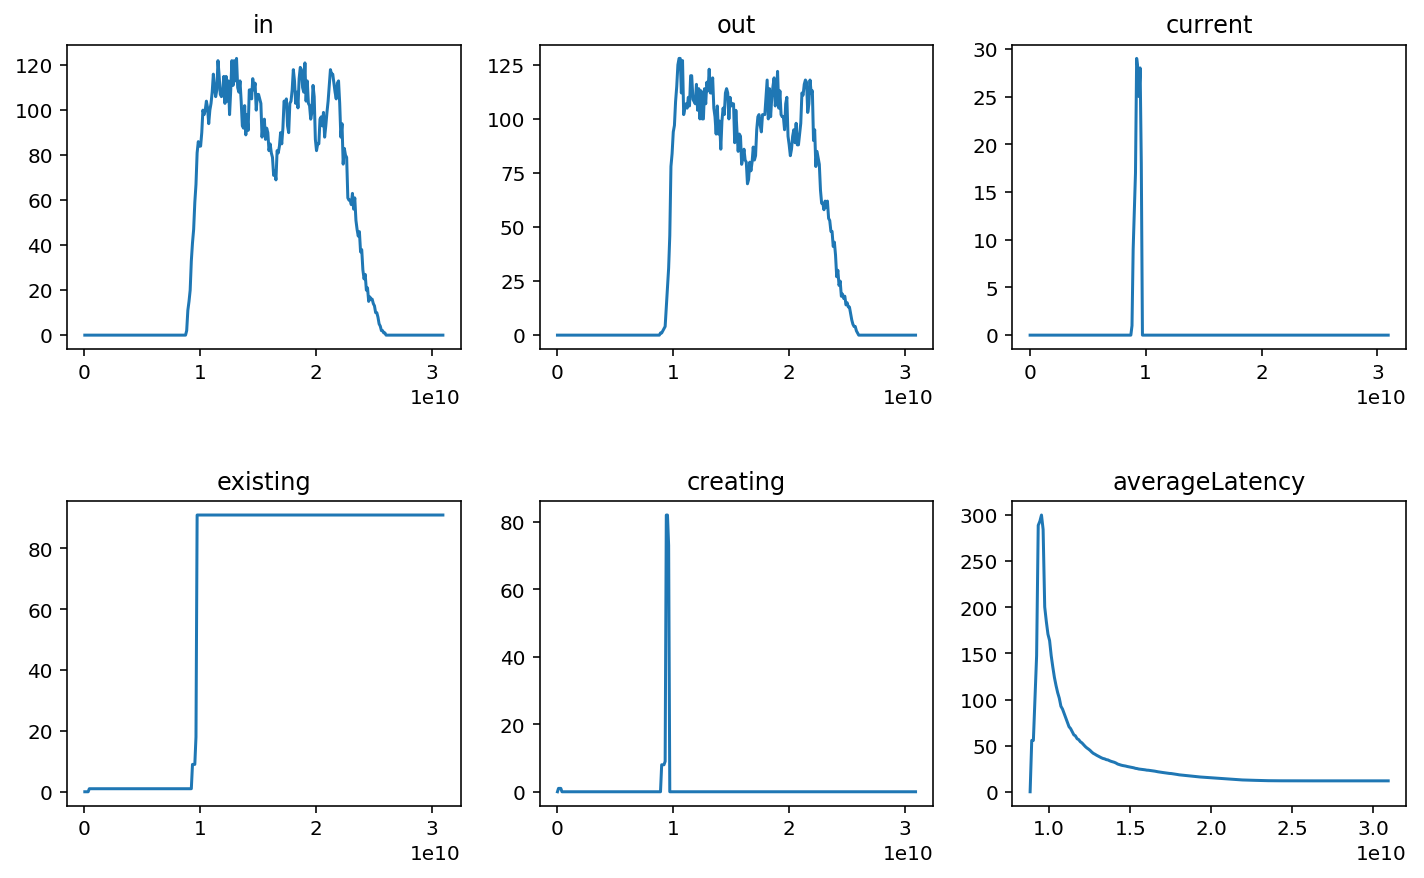

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
fig.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    name = series_metrics[i]
    x, y = snapshots.index.values, snapshots[name]
    if name in smoothed:
        # convert msg/tick to msg/second
        y = y.rolling('1s').sum()
    ax.plot(x, y)
    ax.set_title(name)
plt.show()

### Plot Histogram Metrics

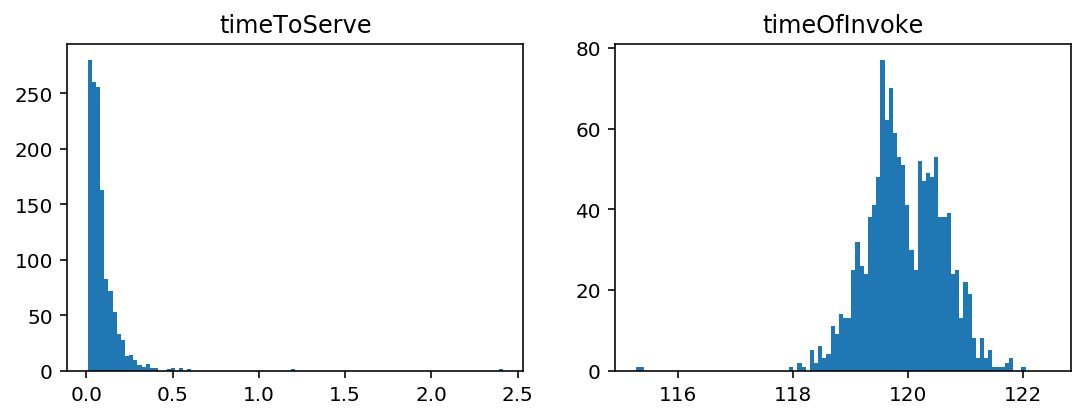

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
fig.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    name = histo_metrics[i]
    y = activations[name] / 1e6 # convert to milliseconds
    ax.hist(y, bins=100, range=(y.min(), np.percentile(y, 95)))
    ax.set_title(name)
plt.show()